In [ ]:
# para conectar con Drive
from google.colab import drive

drive.mount('/content/drive/')

PATH = '/content/drive/My Drive/ML_Practicas_2020/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Descargar los datos de fashion_mnist

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Verificación carga completa del Dataset:
## Conjunto de Entrenamiento
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_train Dimensiones:", x_train.ndim, "y_train Dimensiones:", y_train.ndim)
print("x_train Tipo de Dato:", x_train.dtype, "y_train Tipo de Dato:", y_train.dtype)
print("x_train Tamaño:", x_train.size, "y_train Tamaño:", y_train.size)

print('----------------------------------------------------------')

## Conjunto de Test
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)
print("x_test Dimensiones:", x_test.ndim, "y_test Dimensiones:", y_test.ndim)
print("x_test Tipo de Dato:", x_test.dtype, "y_test Tipo de Dato:", y_test.dtype)
print("x_test Tamaño:", x_test.size, "y_test Tamaño:", y_test.size)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train Dimensiones: 3 y_train Dimensiones: 1
x_train Tipo de Dato: uint8 y_train Tipo de Dato: uint8
x_train Tamaño: 47040000 y_train Tamaño: 60000
----------------------------------------------------------
x_test shape: (10000, 28, 28) y_test shape: (10000,)
x_test Dimensiones: 3 y_test Dimensiones: 1
x_test Tipo de Dato: uint8 y_test Tipo de Dato: uint8
x_test Tamaño: 7840000 y_test Tamaño: 10000


In [ ]:
print("x_train -  rows:",x_train.shape[0]," columns:", x_train.shape[1])
print("x_test -  rows:",x_test.shape[0]," columns:", x_test.shape[1])

x_train -  rows: 60000  columns: 28
x_test -  rows: 10000  columns: 28


60000 train set
10000 test set
y = 0 T-shirt/top


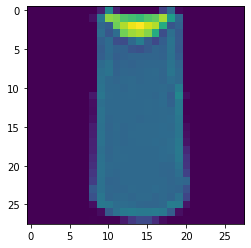

In [ ]:
# Número total de conjunto de dato entrenamiento y prueba

print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Defnición de las etiquetas (Creación Diccionario)
fashion_mnist_labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
                        5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

img_index = 2
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

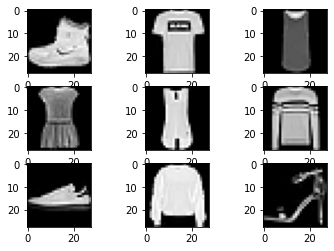

In [ ]:
# Gráfico 9 primeras imágenes del training dataset.
### Como hay 10 clases (0 -9 class labels) defino el subplot dentro de ese rango

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
 # show the figure
plt.show()

In [ ]:
# Cuántas imagenes hay por clase en cada conjunto de dato 

labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
         5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Para conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)

print(unique, counts)

[0 1 2 3 4 5 6 7 8 9] [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


In [ ]:
unique= labels
print(unique, counts)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'} [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


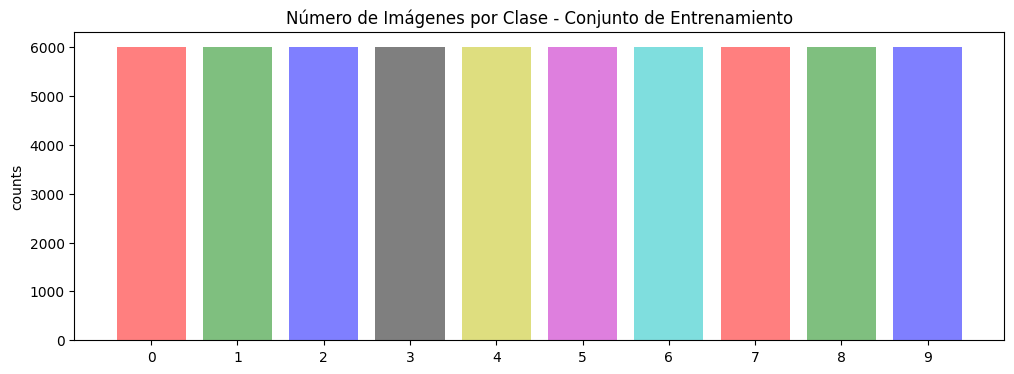

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
# Plot
label =("T-shirt/top","Trouser", "Pullover","Dress","Coat",
        "Sandal","Shirt","Sneaker","Bag","Ankle Boot")
objects = (labels)
y_pos=np.arange(len(objects))
counts = [6000,6000,6000,6000,6000,6000,6000,6000,6000,6000]
plt.subplots(1,1, figsize=(12,4))
plt.bar (y_pos, counts, align='center', alpha=0.5, color='rgbkymc')
plt.xticks(y_pos, objects)
plt.ylabel('counts')
plt.title('Número de Imágenes por Clase - Conjunto de Entrenamiento')
plt.savefig(PATH+'my_figure.png')

plt.show()

In [ ]:
# Para conjunto de test
unique, counts = np.unique(y_test, return_counts=True)
print(unique, counts)

[0 1 2 3 4 5 6 7 8 9] [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [ ]:
unique= labels
print(unique, counts)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'} [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


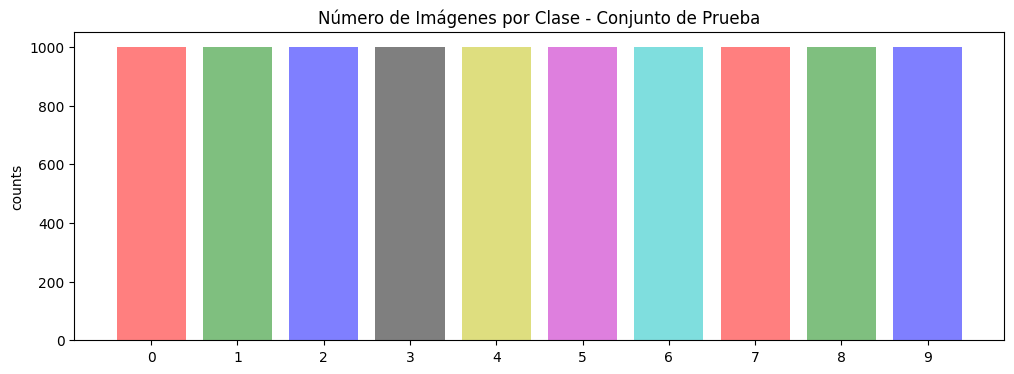

In [ ]:
# Plot
label =("T-shirt/top","Trouser", "Pullover","Dress","Coat",
        "Sandal","Shirt","Sneaker","Bag","Ankle Boot")
objects = (labels)
y_pos=np.arange(len(objects))
counts = [1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]
plt.subplots(1,1, figsize=(12,4))
plt.bar (y_pos, counts, align='center', alpha=0.5, color='rgbkymc')
plt.xticks(y_pos, objects)
plt.ylabel('counts')
plt.title('Número de Imágenes por Clase - Conjunto de Prueba')
plt.savefig(PATH+'my_figure2.png')

plt.show()